# NPS Type-1 SLM Acoustic Data Reduction (Alaska)
Prepare sound level measurements for archive and reporting 🎯<br>
*Davyd_Betchkal@nps.gov*

#### Prerequisites: 

(1) `Acoustic Monitoring Toolbox` $\rightarrow$ `SPLAT` $\rightarrow$ *'File > Process SRCID Files'* creating **DAILYPA**, **PA**, **TOTALPA** <br>
(2) `Acoustic Monitoring Toolbox` $\rightarrow$ `Hourly Metrics` $\rightarrow$ create **SUMMARY**, **METRICS** files <br>
(3)  above files moved to archival `iyore`-accessible data structure
# $\downarrow$

#### This script now bundles 5x separate tasks:



- reduction status check
- remove partial NVSPL days 
- NSNSD R graphs
- NSNSD Python graphs
- LOUDEVENTS
- Cardinal Photograph composite




In [1]:
#==== SETUP OPTIONS ============================

# iyore_dataset_path = r"K:"
# iyore_dataset_path = r"V:\Data 2019"
# iyore_dataset_path = r"V:\Data 2016"
iyore_dataset_path = r"E:"
repo_directory = r"C:\Users\DBetchkal\PythonScripts\3_GITHUB_REPOSITORIES"
unit, site, year_sampled = "GLBA", "BEARD", 2021

# ******** TO DO: a function here that provides a status check! ********

In [4]:
import pandas as pd
import os
import datetime
import sys
from derivedDataFunctions import *

def SPLATNotesHeader(ds, site, year):

    import datetime

    unit = [entry.unit for entry in ds.nvspl(site=site,n=1)][0]
    fullName = [entry.name for entry in ds.nvspl(site=site,n=1)][0]
    src = srcid(ds, site=site, year=year, progbar=False).combine()

    totalDays = number_of_days_splatted(src)

    # number of days without overflights
    n_without = len(src[src.srcID == 0])

    # percentage without
    percentWithout = "{:0.2f} %".format(100*n_without/totalDays)

    # return a series containing the total number of days
    daysAnalyzed = days_splatted(src)
    beginDay = daysAnalyzed.iloc[0].values[0]
    endDay = daysAnalyzed.iloc[-1].values[0]

    # this approach gives EVERY day inbetween the start and end days,
    # note that it doesn't mean there are NVSPL for these days
    sampleCoverage = endDay - beginDay + datetime.timedelta(days=1)
    sampleCoverage = sampleCoverage.days
    dateRange = pd.Series([beginDay + datetime.timedelta(days=i) for i in range(sampleCoverage)])
    
    omittedDays = pd.DataFrame(dateRange[~dateRange.isin(daysAnalyzed['date'])].dropna())
    
    if(len(omittedDays) == 0):

        omitString = "None."

    elif(len(omittedDays) > 0):

        omitString = ""
        for n, day in enumerate(omittedDays.iloc[0:-1].iterrows()):
            omitString = omitString + day[1].values[0].strftime("%m/%d/%Y") + ", "

            if((n == 10)  | ((n > 10) & ((n-2)%8 == 0))): #
                omitString = omitString + "\n"

        omitString = omitString + str(omittedDays.iloc[-1].values[0].strftime("%m/%d/%Y")) + "."

    print(unit + site + " " + fullName + ", " + str(year))
    print("(Total Days: " + str(totalDays) + ", Days without overflights: " + str(n_without) + ") = " + percentWithout)
    print("Begin: " + beginDay.strftime("%m/%d/%Y") + ",  End: " + endDay.strftime("%m/%d/%Y") + ",  Omit: " + omitString[0:36])
    print(omitString[36:])



splat_dir = iyore.Dataset(r"C:\Users\DBetchkal\Documents\ToolboxOutput\Splat")
# active = iyore.Dataset(r"E:\Sound Data")
active = iyore.Dataset(r"V:\Data 2020")

print("Summary of SPLAT progress for this year's data:\n---------------------------------------\n")
for entry in active.dataDir(year=2020):
    
    if ((entry.unit+entry.site not in [e.unit+e.site for e in active.srcid()])&
       (entry.unit+entry.site in [e.unit+e.site for e in splat_dir.srcid()])):

        last = pd.to_datetime(srcid(splat_dir, unit=entry.unit, 
                           site=entry.site, progbar=False).combine().tail(1).index.values[0])

        if last is not None:

            print(entry.unit+entry.site+": last annotation  ", last)
       
    
    elif entry.unit+entry.site not in [e.unit+e.site for e in splat_dir.srcid()]:
        
        
        try: # this is the case you're finished!
            
            mod = os.path.getmtime([e.path for e in active.srcid(unit=entry.unit, site=entry.site, year=entry.year)][0])
            mod_timestamp = datetime.datetime.fromtimestamp(mod).strftime("%Y-%m-%d %H:%M:%S")
            
            print(entry.unit+entry.site+": completed on     ", mod_timestamp, "********")
            
            try:
                print(SPLATNotesHeader(active, entry.site, entry.year))
                
            except AttributeError:
                print("cannot generate SPLAT notes")

            print('')
            
        except IndexError: # but... often you're not... in fact, if we fall in this category... we haven't even STARTED yet.
            
            print(entry.unit+entry.site+": not initialized!")
            
            print('')


NameError: name 'iyore' is not defined

  0%|          | 0/1 [00:00<?, ?entries/s]

metrics file to use: E:\\2021 GLBABEARD Beardsley Entrance\\02 ANALYSIS\\SPL Analysis\\METRICS_GLBABEARD.txt
graph output: E:\\2021 GLBABEARD Beardsley Entrance\\02 ANALYSIS\\Computational Outputs
NSNSD graphics created!
Output Directory: E:\2021 GLBABEARD Beardsley Entrance\02 ANALYSIS\Computational Outputs


  0%|          | 0/1 [00:00<?, ?entries/s]

  0%|          | 0/1 [00:00<?, ?entries/s]

0entries [00:00, ?entries/s]

There was an error with Plot 3!


Traceback (most recent call last):
  File "C:\Users\DBetchkal\PythonScripts\3_GITHUB_REPOSITORIES\AcousticsToolkit-SLM\reportingGraphics_AKR.py", line 208, in reportingGraphicsAKR
    loudevents["above"]
TypeError: 'NoneType' object is not subscriptable


0entries [00:00, ?entries/s]

There was an error with Plot 4!


Traceback (most recent call last):
  File "C:\Users\DBetchkal\PythonScripts\3_GITHUB_REPOSITORIES\AcousticsToolkit-SLM\reportingGraphics_AKR.py", line 284, in reportingGraphicsAKR
    d = loudevents["above"]
TypeError: 'NoneType' object is not subscriptable


0entries [00:00, ?entries/s]

There was an error with Plot 5!


Traceback (most recent call last):
  File "C:\Users\DBetchkal\PythonScripts\3_GITHUB_REPOSITORIES\AcousticsToolkit-SLM\reportingGraphics_AKR.py", line 342, in reportingGraphicsAKR
    plt.hist(eventsperday, bins=list(range(0,105,5)), color="k")
UnboundLocalError: local variable 'eventsperday' referenced before assignment


  0%|          | 0/1 [00:00<?, ?entries/s]

There was an error with Plot 6!


Traceback (most recent call last):
  File "C:\Users\DBetchkal\PythonScripts\3_GITHUB_REPOSITORIES\AcousticsToolkit-SLM\reportingGraphics_AKR.py", line 372, in reportingGraphicsAKR
    dt.sort()
  File "C:\Users\DBetchkal\Anaconda3\envs\flight-sound\lib\site-packages\pandas\core\generic.py", line 5465, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'Series' object has no attribute 'sort'


  0%|          | 0/1 [00:00<?, ?entries/s]

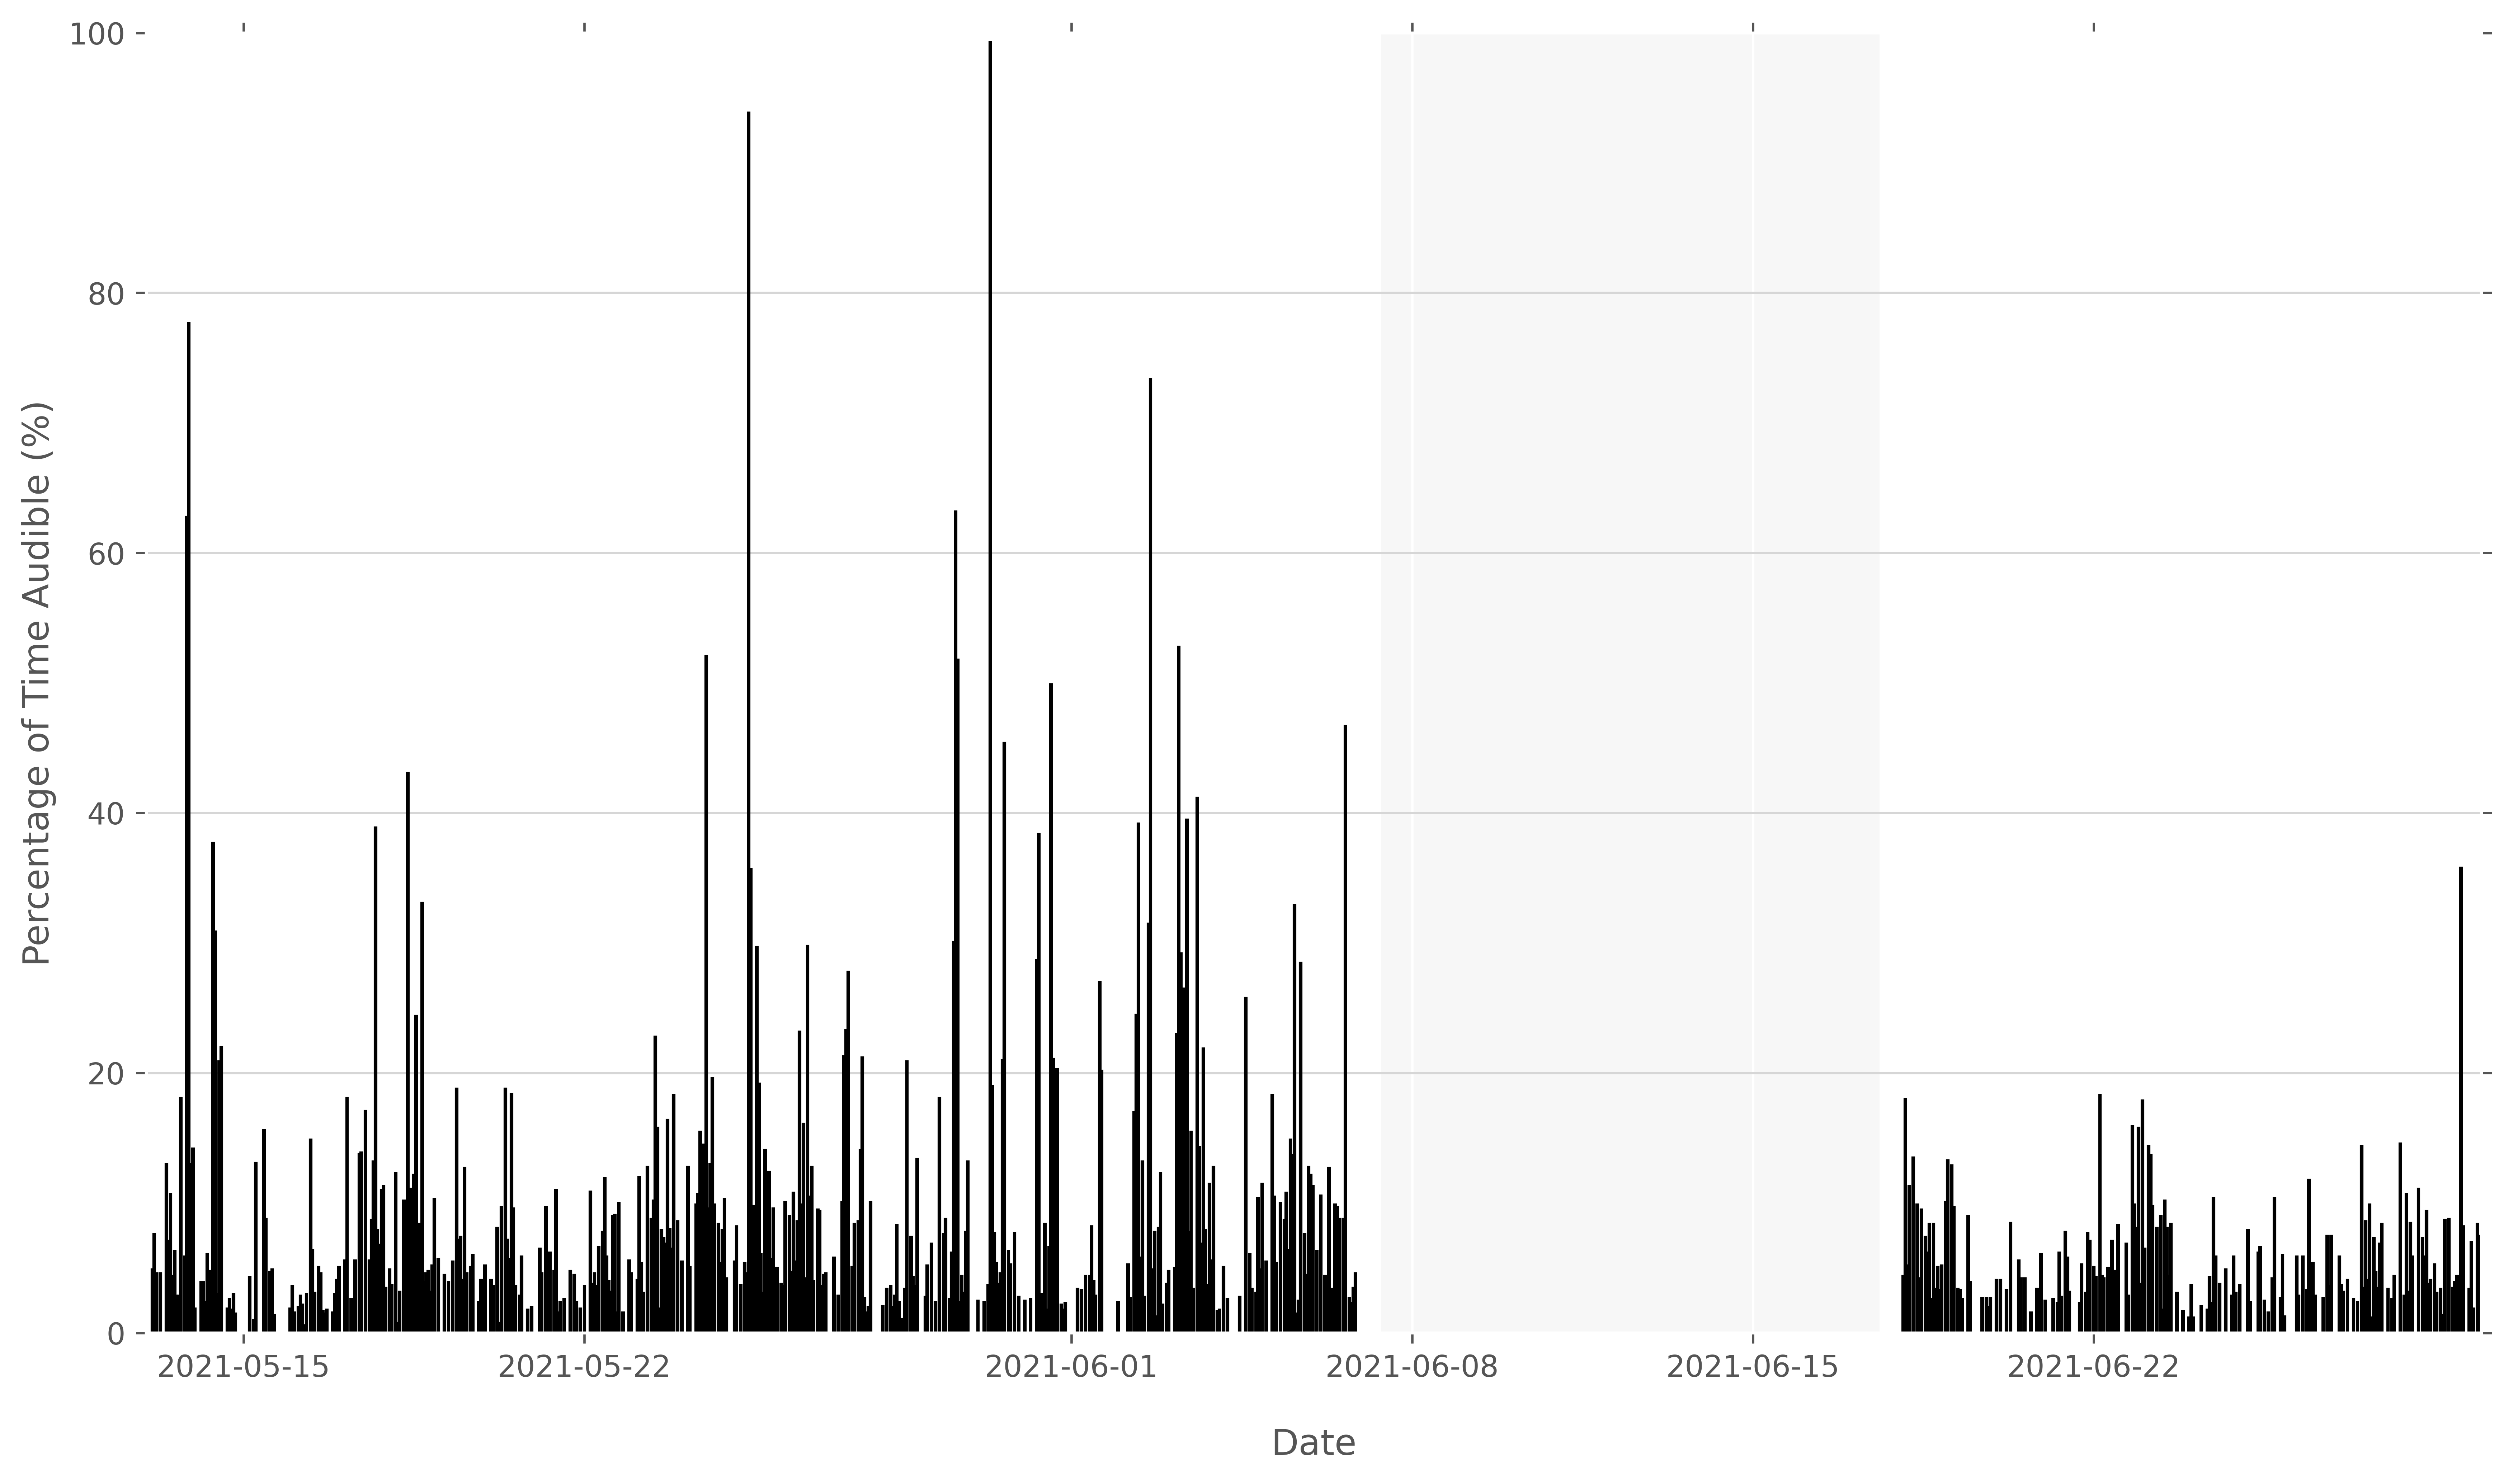

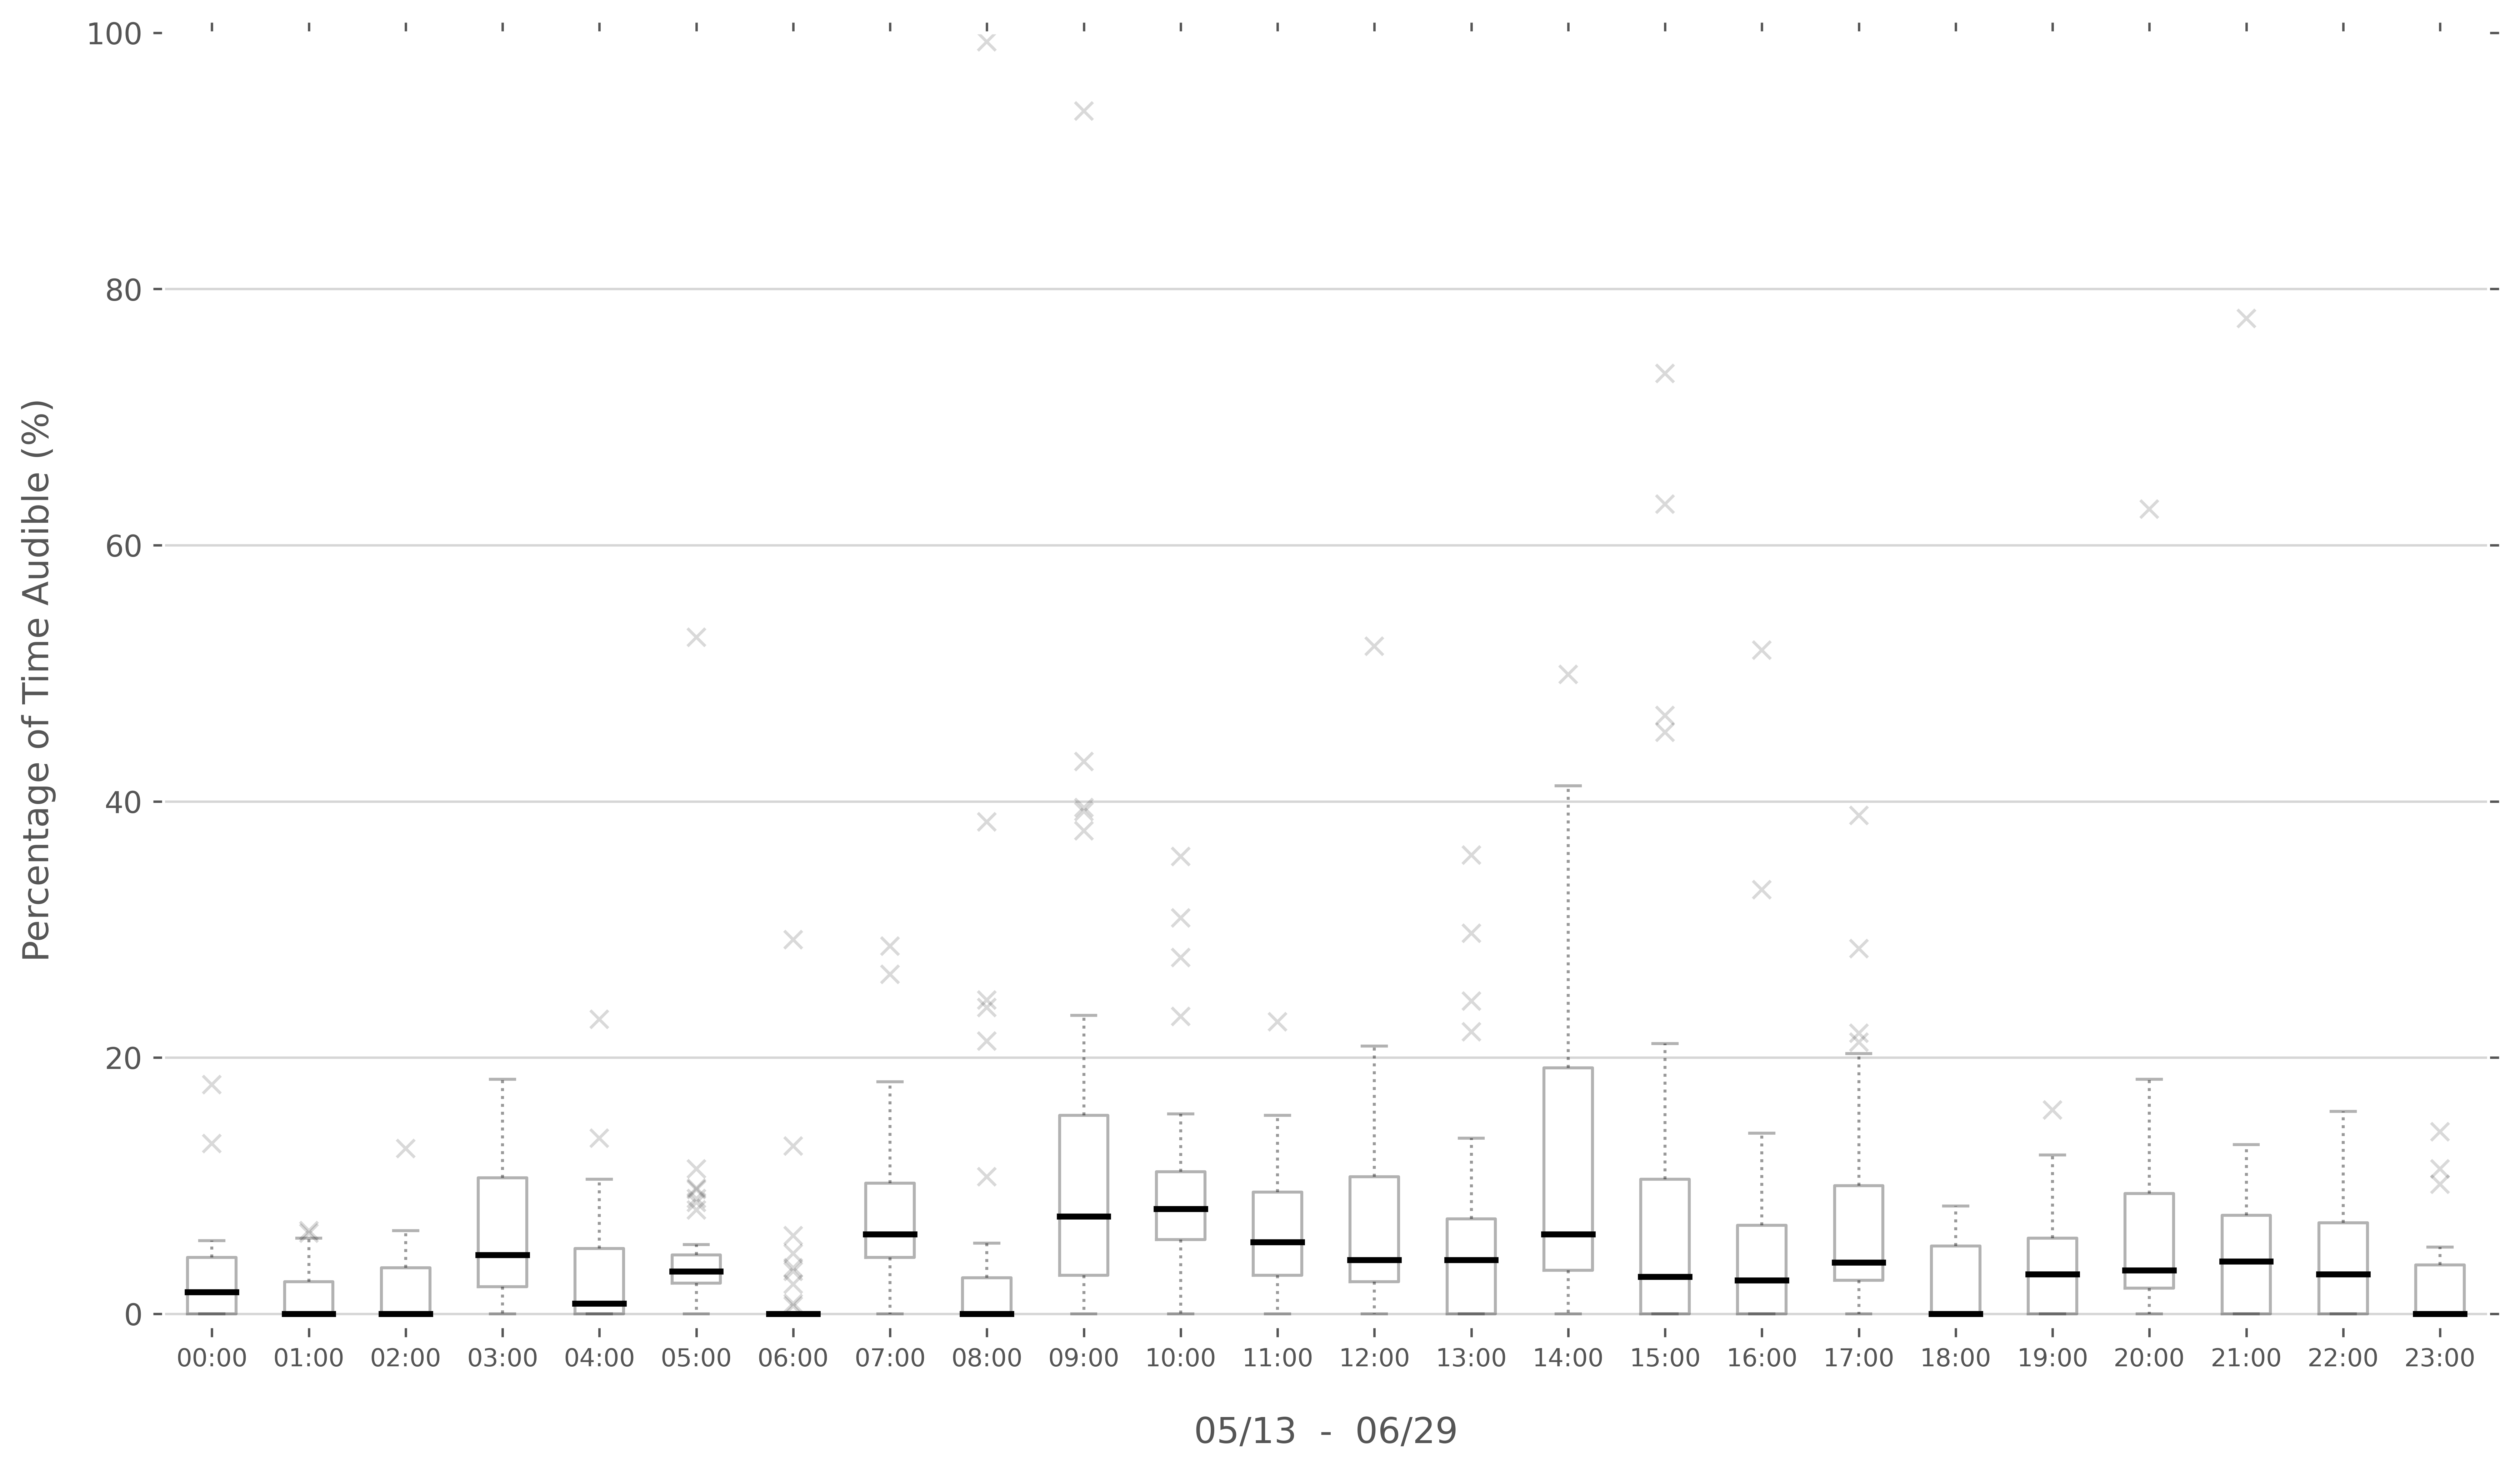

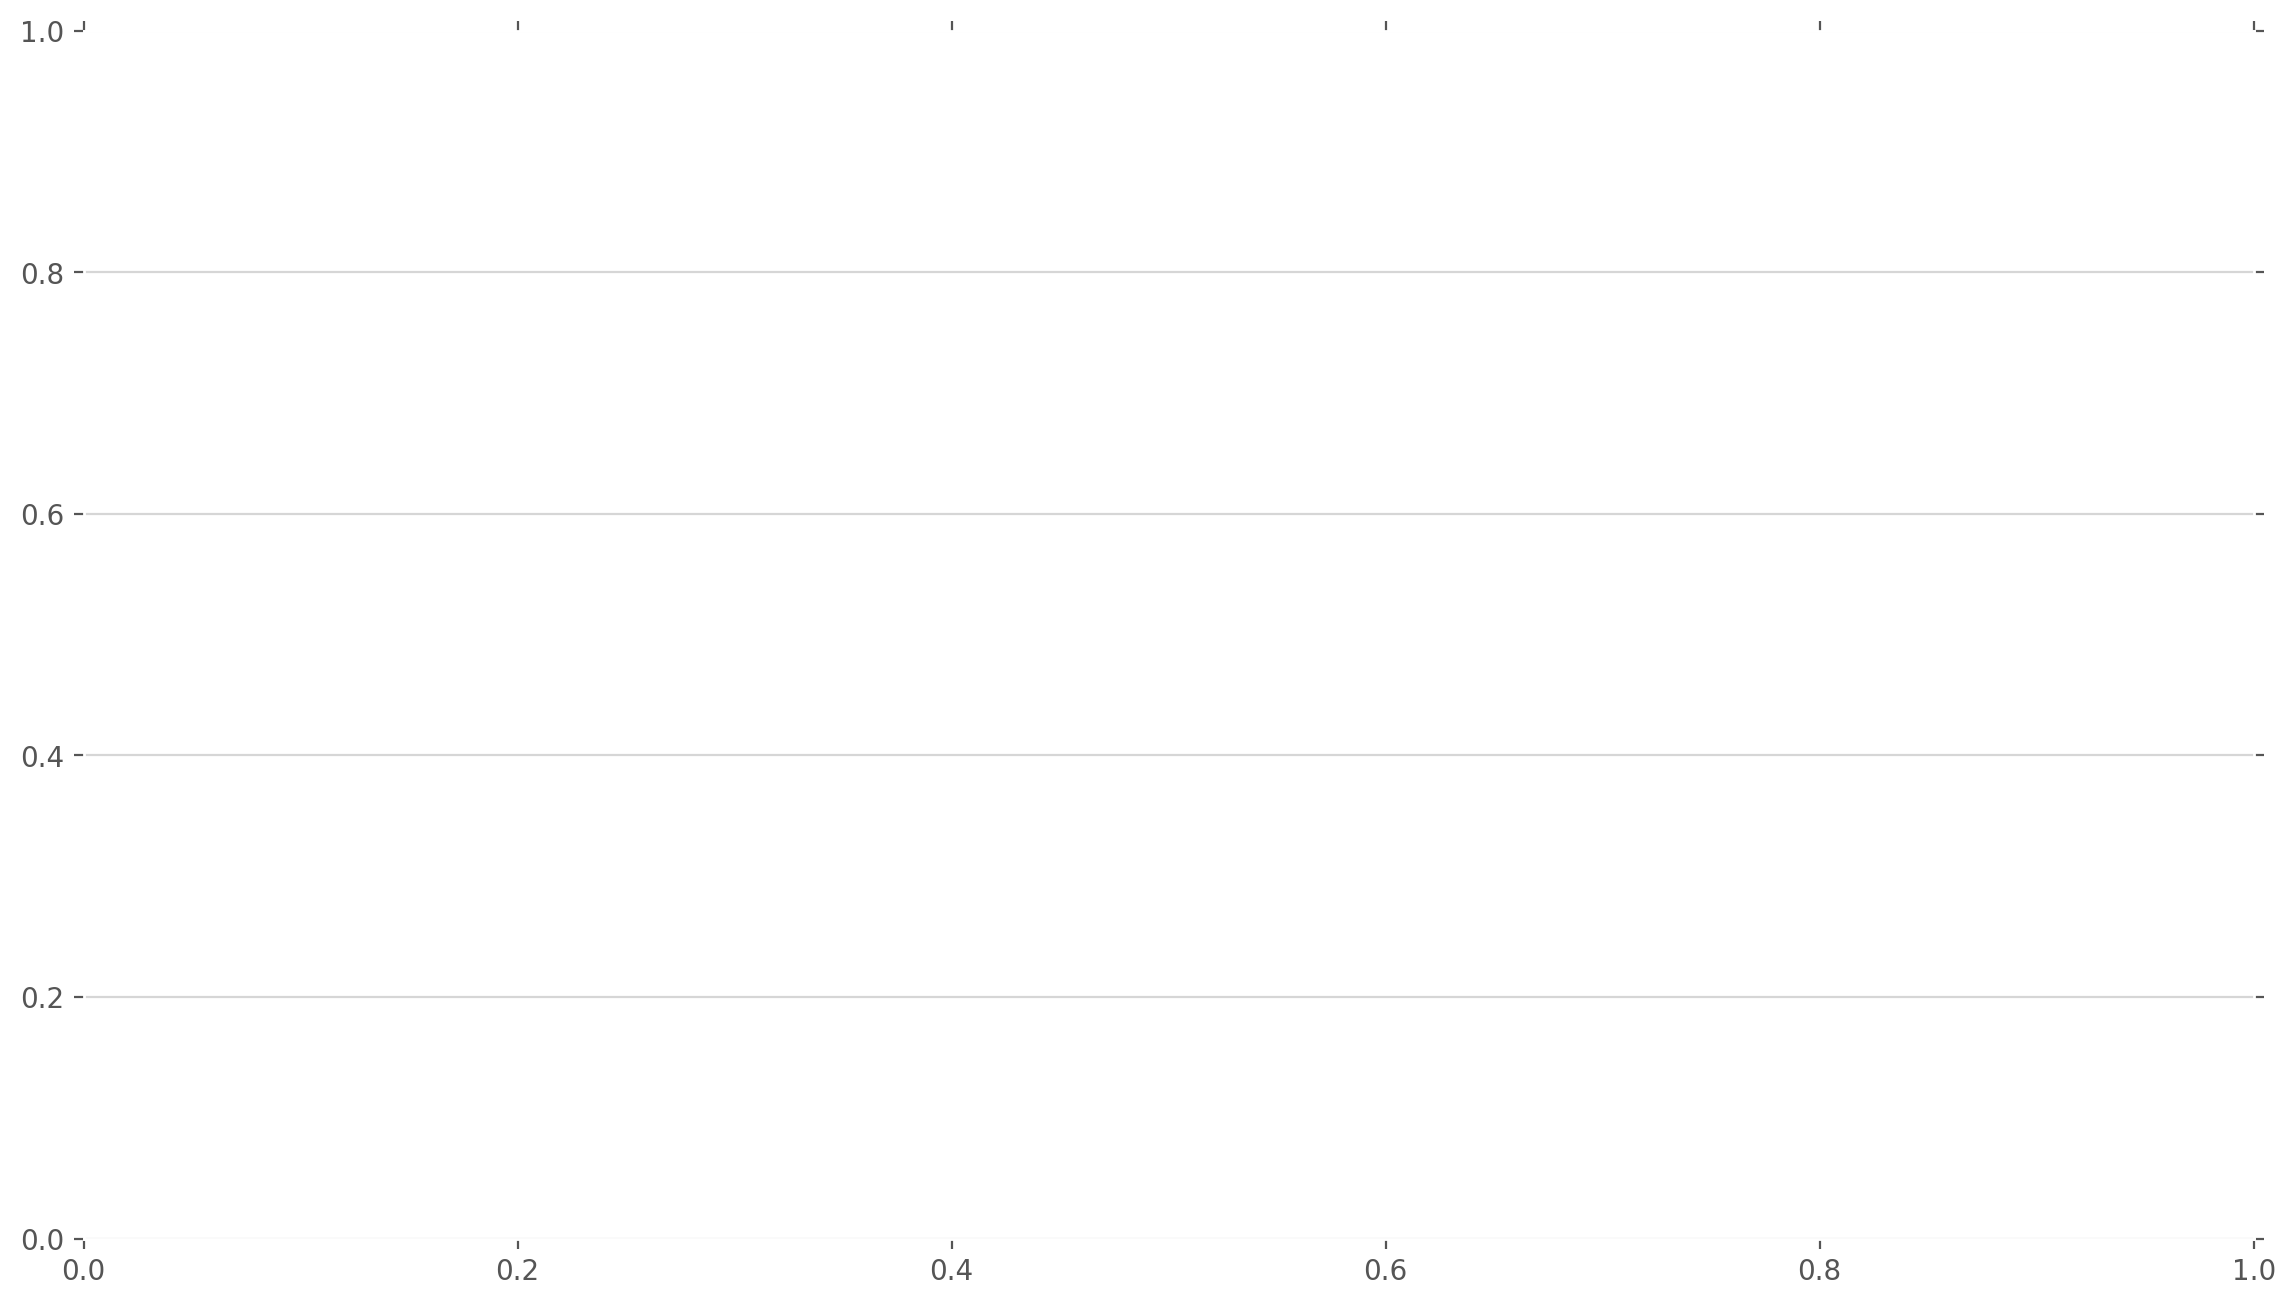

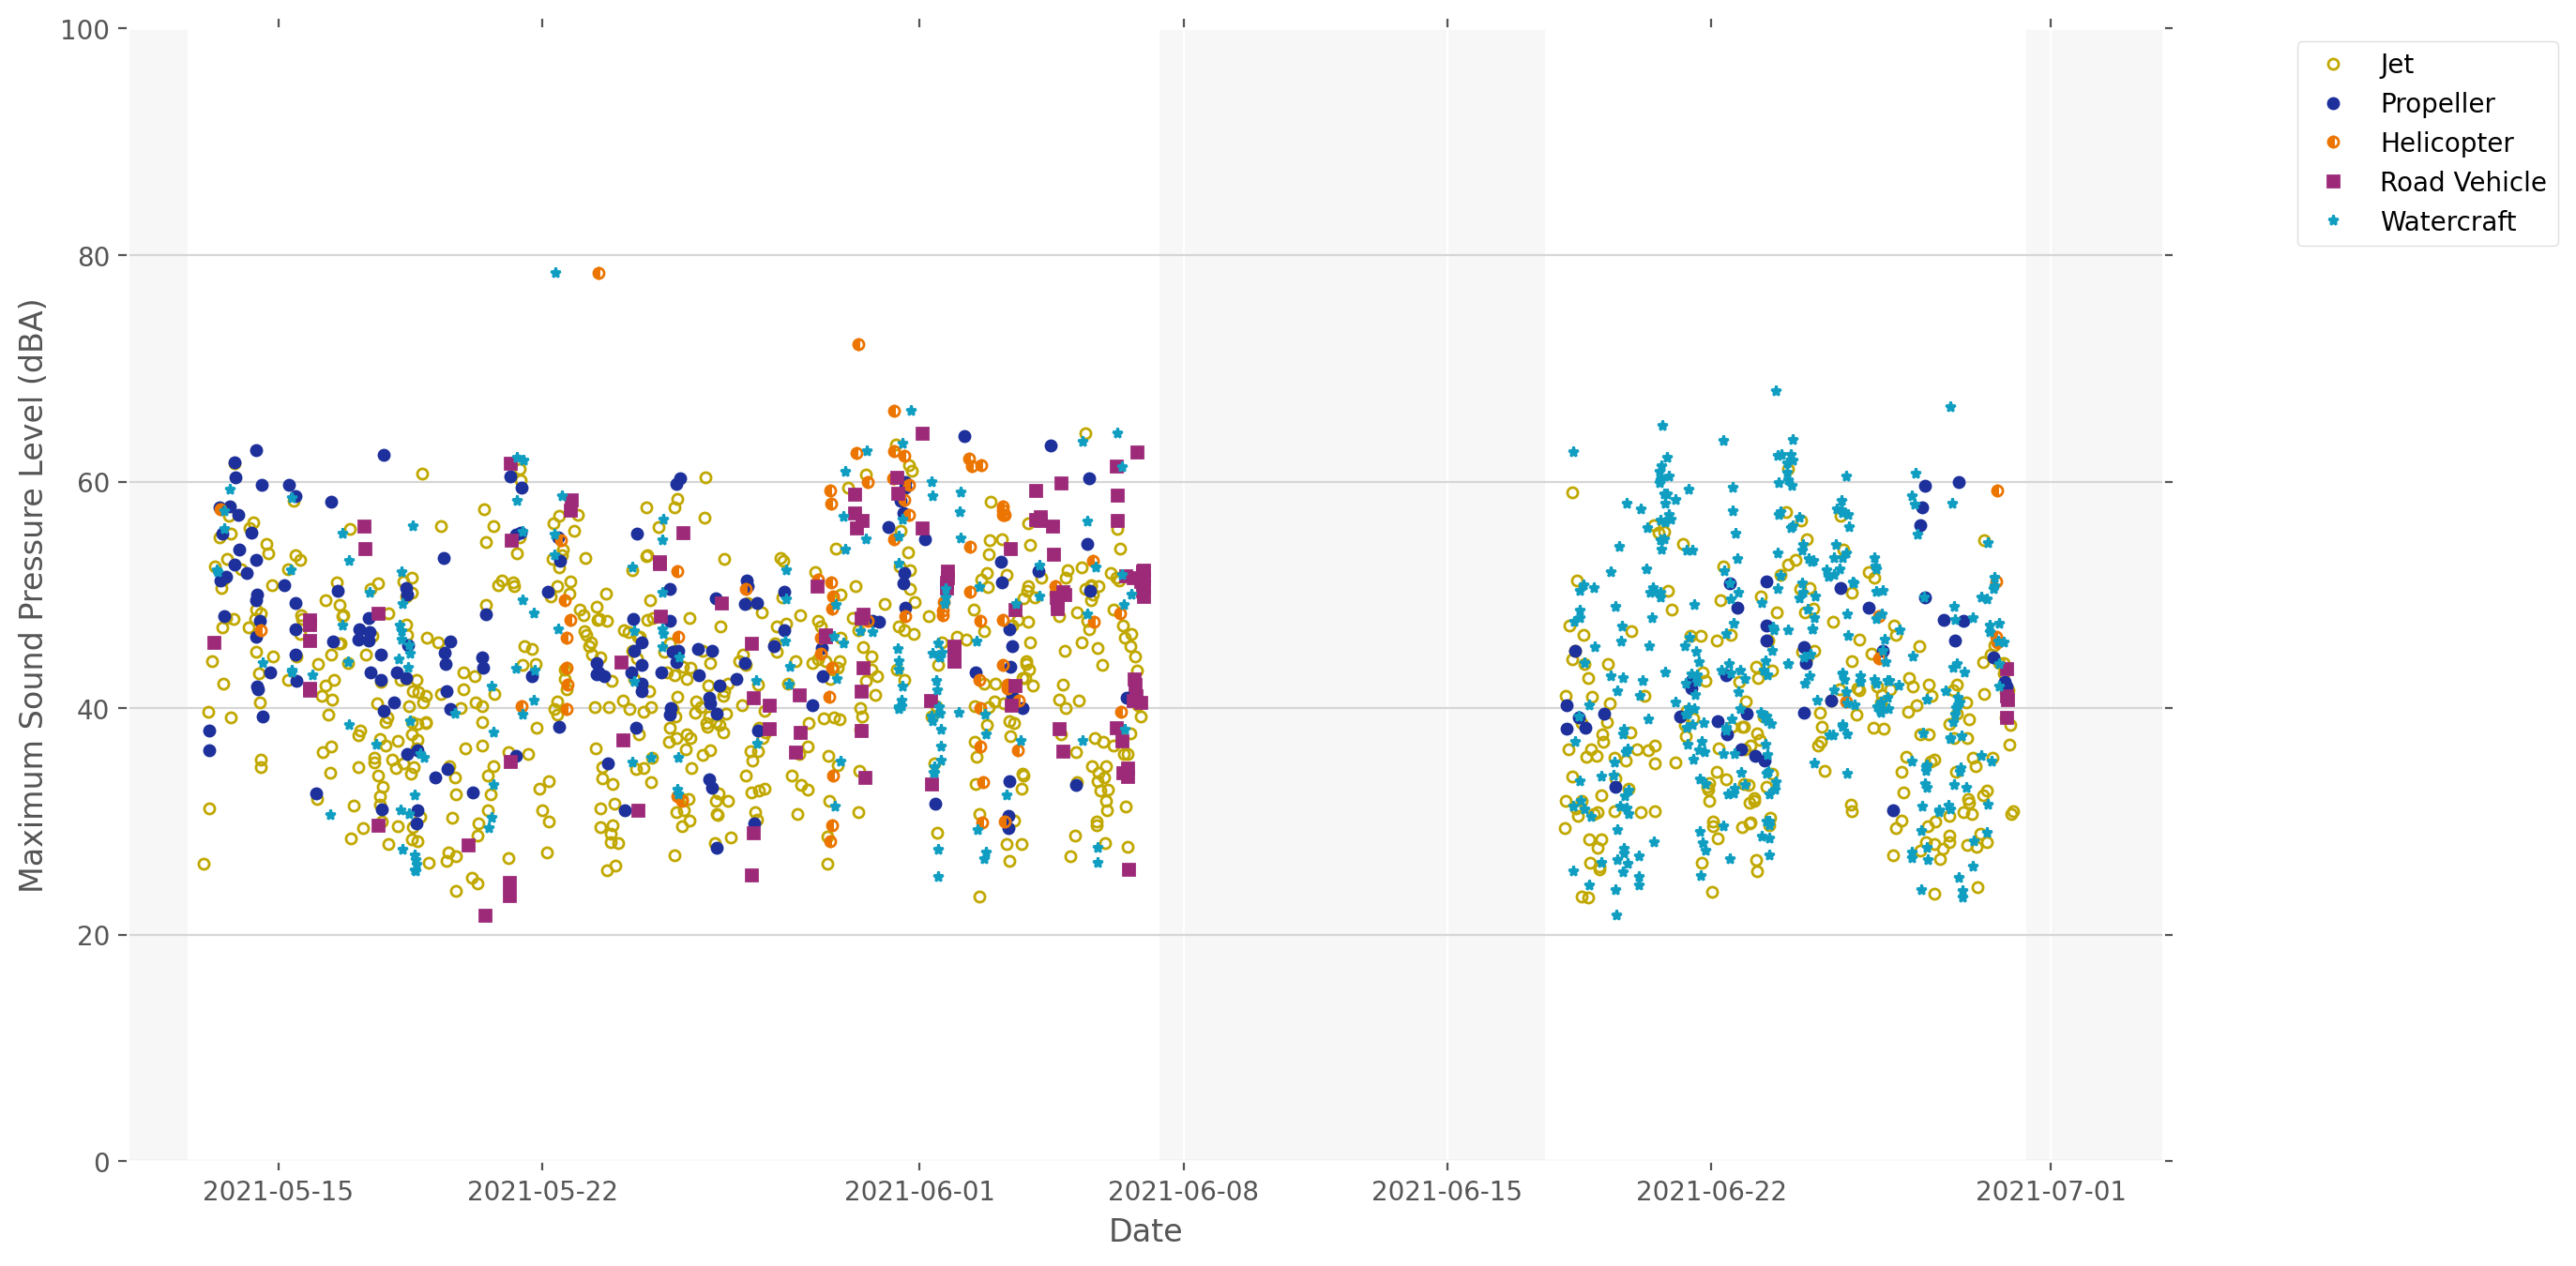

  0%|          | 0/1 [00:00<?, ?entries/s]

Shapiro-Wilk test of normality
p = 0.0000027
AKR graphics created!


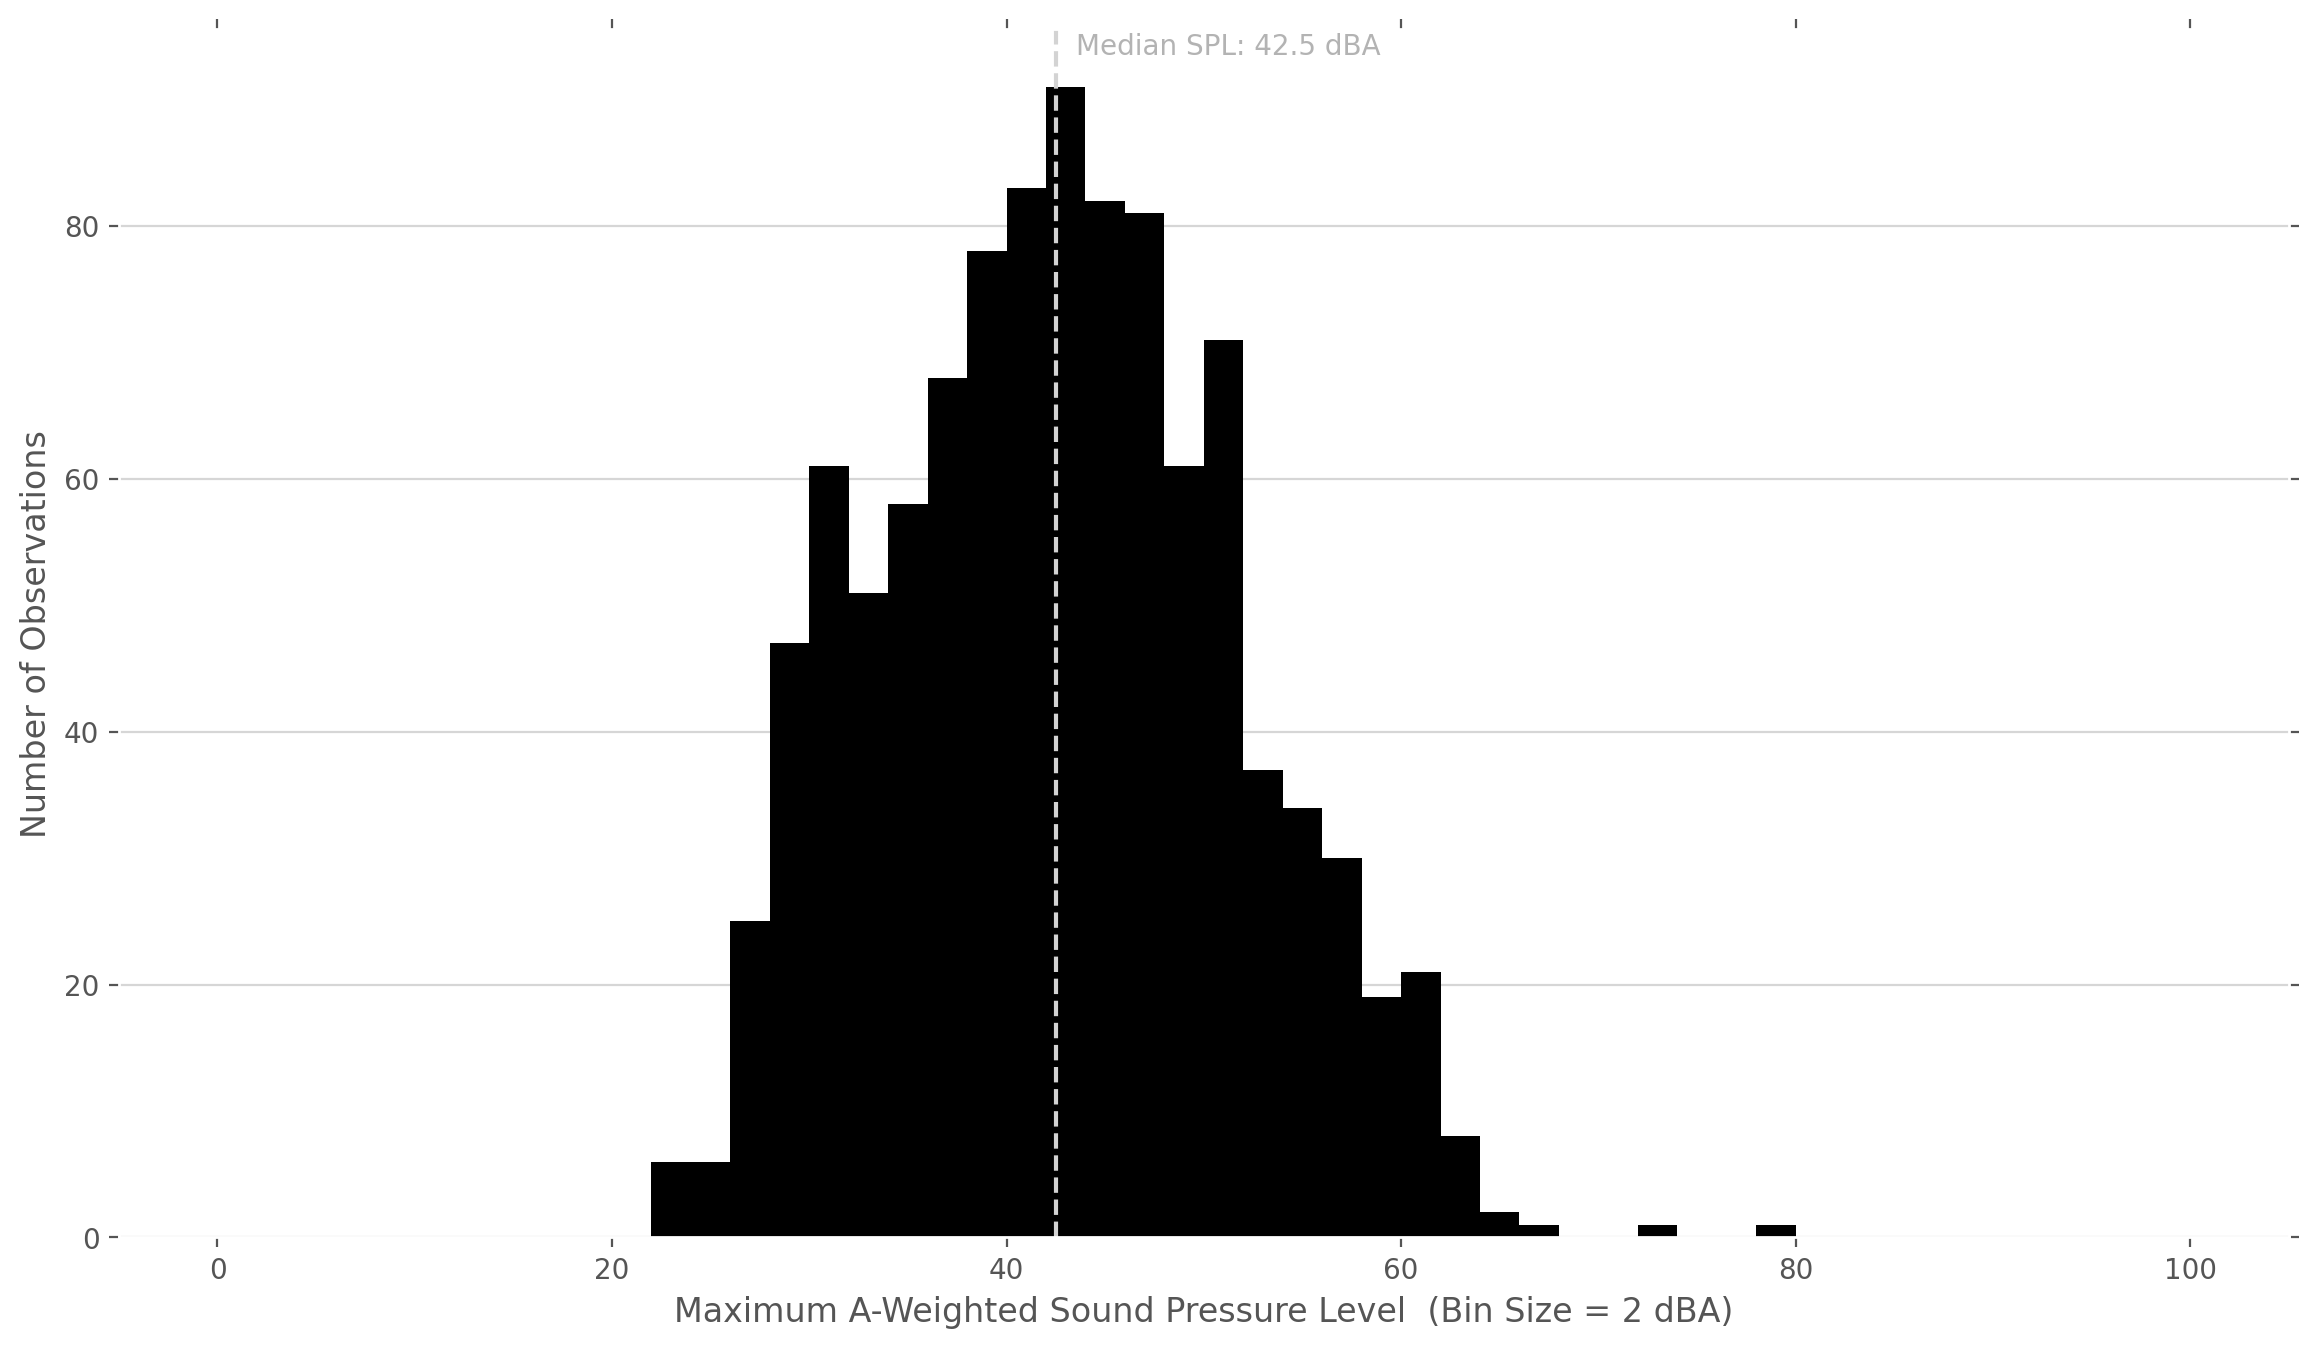

In [3]:
import pyper
from graphsR import *
from createLOUDEVENTS_AKR import * # LOUDEVENTS HAS SOME KNOWN ISSUES
from reportingGraphics_AKR import *

# # first step, create LOUDEVENTS
# create_LOUDEVENTS_AKR(iyore_dataset_path, site, year_sampled, source = "air")
# print("LOUDEVENTS created!")

# second step, create standard NSNSD graphics
graphsR(iyore_dataset_path, repo_directory, unit, site, year_sampled)
print("NSNSD graphics created!")

# third step, create standard AKR graphics
reportingGraphicsAKR(iyore_dataset_path, unit, site, year_sampled)
print("AKR graphics created!")

# additional modular steps can be added on later...